In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mae

In [2]:
# data cleaning
file="fosil Train.csv"
test_file="fosil Test.csv"
test_data=pd.read_csv(test_file)
test_data=pd.DataFrame(test_data)
data=pd.read_csv(file)
data=pd.DataFrame(data)
data.head(5)

,sku_name,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,...,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
0,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,...,7,2016,U,0.000000,0,0,0,1,0,1
1,YOSHWARDTERR,0,2026,0,0,0,2026,0,0,0,...,2,2017,U,0.000000,0,0,0,1,0,0
2,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,...,5,2017,U,0.000000,0,0,0,1,0,0
3,YOSHUANEMARX,0,320108,4052,40520,240081,4052,6078,18234,0,...,4,2018,W,0.270966,1,1,0,0,1,1
4,YOSHUANEMARX,0,132703,2026,0,81040,3039,25325,18234,0,...,5,2018,W,0.063004,0,1,0,0,1,0


In [3]:
data.corr()

,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,...,price,month,year,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
starting_inventory,1.000000,0.440898,0.453275,0.275484,0.162112,-0.034422,0.239737,0.099611,0.314297,-0.032089,...,-0.017445,0.022575,0.077422,0.026621,0.073456,0.096762,-0.031579,-0.017869,0.024908,0.013748
sellin,0.440898,1.000000,0.934619,0.644332,0.453059,0.206730,0.430291,0.260087,0.531310,0.119088,...,-0.033001,0.073977,-0.045199,0.047484,0.147573,0.152189,-0.050115,0.023059,-0.011770,-0.005004
sellin_channel_1,0.453275,0.934619,1.000000,0.504755,0.338491,-0.010130,0.347477,0.177517,0.476426,-0.004022,...,-0.033907,0.088215,-0.029019,0.034065,0.117354,0.112165,-0.040292,0.023926,-0.014837,-0.004005
sellin_channel_2,0.275484,0.644332,0.504755,1.000000,0.242143,-0.003514,0.273330,0.098772,0.317326,-0.013154,...,-0.040490,-0.010105,0.015095,0.024490,0.080984,0.104491,-0.037795,0.006983,0.001507,-0.017145
sellin_channel_3,0.162112,0.453059,0.338491,0.242143,1.000000,-0.005221,0.175846,0.171467,0.165568,-0.044766,...,0.016973,0.072531,-0.100879,0.046356,0.118210,0.114948,-0.039500,0.014189,-0.005300,0.011624
sellin_channel_4,-0.034422,0.206730,-0.010130,-0.003514,-0.005221,1.000000,0.004403,0.080833,-0.013805,0.285019,...,0.010308,0.010604,-0.044437,0.005154,0.043149,0.059173,-0.015444,0.001147,0.002318,0.002143
sellin_channel_5,0.239737,0.430291,0.347477,0.273330,0.175846,0.004403,1.000000,0.053504,0.213250,-0.009397,...,-0.047927,-0.004052,0.000286,-0.000165,0.029647,0.038828,-0.025450,-0.028119,0.033759,-0.012419
sellin_channel_6,0.099611,0.260087,0.177517,0.098772,0.171467,0.080833,0.053504,1.000000,0.089392,0.067393,...,0.005970,0.071802,0.082552,0.208560,0.313917,0.262062,-0.007197,0.030804,-0.029119,0.050743
sellin_channel_7,0.314297,0.531310,0.476426,0.317326,0.165568,-0.013805,0.213250,0.089392,1.000000,-0.021555,...,-0.024005,0.010418,-0.038487,0.015220,0.058520,0.056167,-0.021129,0.014607,-0.009836,-0.014378
sellin_channel_8,-0.032089,0.119088,-0.004022,-0.013154,-0.044766,0.285019,-0.009397,0.067393,-0.021555,1.000000,...,0.000023,0.005264,0.029705,0.001198,0.019717,0.067929,-0.014807,0.005546,-0.002214,-0.013985


In [4]:
data.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
44902    0
44903    0
44904    0
44905    0
44906    0
Length: 44907, dtype: int64

In [5]:
from pandas_profiling import ProfileReport as pp

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(["sku_name","price","month","year","FLAG100","disc_month","cum_disc","CAT_GENDER_BOTH","CAT_GENDER_MEN","CAT_GENDER_WOMEN","Weeks","product_lifecycle_stage"],axis=1),data["sellin"],test_size=0.2,random_state=0)

In [7]:
x=np.array(x_train)
y=np.array(y_train)
x=sm.add_constant(x)
model=sm.OLS(y,x)
model=model.fit()
result=model.summary()
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.907e+11
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:00:44   Log-Likelihood:            -1.6044e+05
No. Observations:               35925   AIC:                         3.209e+05
Df Residuals:                   35894   BIC:                         3.212e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.353e-11      0.155  -1.52e-10      1.000      -0.304       0.304
x1         -1.577e-15   1.08e-07  -1.46e-08      1.000   -2.12e-07    2.12e-07
x2             0.0319    9.6e+06   3.32e-09      1.000   -1.88e+07    1.88e+07
x3         -9.728e-15   5.94e-06  -1.64e-09      1.000   -1.16e-05    1.16e-05
x4         -9.492e-15    6.1e-06  -1.56e-09      1.000    -1.2e-05     1.2e-05
x5         -6.495e-15   6.22e-06  -1.04e-09      1.000   -1.22e-05    1.22e-05
x6         -8.493e-15   5.88e-06  -1.44e-09      1.000   -1.15e-05    1.15e-05
x7         -1.488e-14   6.63e-06  -2.24e-09      1.000    -1.3e-05     1.3e-05
x8         -7.883e-15    1.7e-05  -4.65e-10      1.000   -3.32e-05    3.32e-05
x9         -1.521e-14   7.02e-06  -2.17e-09      1.000   -1.38e-05    1.38e-05
x10        -1.146e-14   6.44e-06  -1.78e-09      1.000   -1.26e-05    1.26e-05
x11            0.8748   8.64e+06   1.01e-07      1.000   -1.69e+07    1.69e+07
x12         1.527e-16   4.87e-05   3.13e-12      1.000   -9.55e-05    9.55e-05
x13            0.9682    9.6e+06   1.01e-07      1.000   -1.88e+07    1.88e+07
x14            0.0934   9.55e+05   9.78e-08      1.000   -1.87e+06    1.87e+06
x15            0.0934   9.55e+05   9.78e-08      1.000   -1.87e+06    1.87e+06
x16            0.0934   9.55e+05   9.78e-08      1.000   -1.87e+06    1.87e+06
x17            0.0933   9.55e+05   9.77e-08      1.000   -1.87e+06    1.87e+06
x18            0.0933   9.55e+05   9.78e-08      1.000   -1.87e+06    1.87e+06
x19            0.0934   9.55e+05   9.78e-08      1.000   -1.87e+06    1.87e+06
x20            0.0933   9.55e+05   9.78e-08      1.000   -1.87e+06    1.87e+06
x21            0.0933   9.55e+05   9.78e-08      1.000   -1.87e+06    1.87e+06
x22            0.0933   9.55e+05   9.78e-08      1.000   -1.87e+06    1.87e+06
x23            0.0933   9.55e+05   9.78e-08      1.000   -1.87e+06    1.87e+06
x24          -6.8e-16   4.87e-05   -1.4e-11      1.000   -9.55e-05    9.55e-05
x25        -9.992e-16   4.87e-05  -2.05e-11      1.000   -9.55e-05    9.55e-05
x26          2.22e-16   4.87e-05   4.56e-12      1.000   -9.54e-05    9.54e-05
x27        -1.388e-16   4.87e-05  -2.85e-12      1.000   -9.55e-05    9.55e-05
x28         2.776e-16   4.88e-05   5.69e-12      1.000   -9.56e-05    9.56e-05
x29         1.482e-06     22.784    6.5e-08      1.000     -44.657      44.657
x30         -5.69e-16    4.9e-05  -1.16e-11      1.000    -9.6e-05     9.6e-05
x31        -3.914e-15    5.2e-05  -7.52e-11      1.000      -0.000       0.000
x32         9.992e-16   4.91e-05   2.04e-11      1.000   -9.62e-05    9.62e-05
x33         9.159e-16   4.89e-05   1.87e-11      1.000   -9.58e-05    9.58e-05
==============================================================================
Omnibus:                    32451.038   Durbin-Watson:                   1.803
Pr

In [8]:
np.asarray(x_train)

array([[     0,   1013,   1013, ...,      0,      0,      0],
       [     0,  51663,   5065, ...,   7091,      0,  18234],
       [     0,   3039,      0, ...,   5065,      0,  18234],
       ...,
       [     0, 502448, 104339, ...,   5065,   1013,  72936],
       [     0,  58754,  43559, ...,   1013,  81040,  33429],
       [     0,  56728,      0, ...,   4052,      0,   3039]], dtype=int64)

In [9]:
from sklearn.linear_model import LinearRegression as LR
lr=LR().fit(x_train,y_train)

In [10]:
lr.score(x_train,y_train)

1.0

In [11]:
lr.score(x_test,y_test)

1.0

In [12]:
pred=lr.predict(x_test)

In [13]:
mae(y_test,pred)

2.4753036189702275e-09

In [14]:
data_1=data[["sku_name","month","year","CAT_GENDER_BOTH","CAT_GENDER_MEN","CAT_GENDER_WOMEN","sellin"]]

In [15]:
data_1

,sku_name,month,year,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,sellin
0,YOSHWARDTERR,7,2016,0,1,0,1013
1,YOSHWARDTERR,2,2017,0,1,0,2026
2,YOSHWARDTERR,5,2017,0,1,0,1013
3,YOSHUANEMARX,4,2018,0,0,1,320108
4,YOSHUANEMARX,5,2018,0,0,1,132703
...,...,...,...,...,...,...,...
44902,ABEAHAMASHL,6,2021,0,0,1,156002
44903,ABEAHAMASHL,7,2021,0,0,1,34442
44904,ABEAHAMASHL,8,2021,0,0,1,38494
44905,ABEAHAMASHL,9,2021,0,0,1,29377


In [16]:
data_1["date"]=(data_1["month"]).astype("string") +"-"+ (data_1["year"]).astype("string")

C:\Users\SAMSON\AppData\Local\Temp/ipykernel_968/245375153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1["date"]=(data_1["month"]).astype("string") +"-"+ (data_1["year"]).astype("string")


In [17]:
data_1["date"]=pd.to_datetime(data_1["date"])

C:\Users\SAMSON\AppData\Local\Temp/ipykernel_968/3236125914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1["date"]=pd.to_datetime(data_1["date"])


In [18]:
data_1.corr()

,month,year,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,sellin
month,1.000000,-0.047985,-0.017883,0.002605,0.001410,0.073977
year,-0.047985,1.000000,-0.076193,0.005868,0.011228,-0.045199
CAT_GENDER_BOTH,-0.017883,-0.076193,1.000000,-0.101973,-0.122462,-0.050115
CAT_GENDER_MEN,0.002605,0.005868,-0.101973,1.000000,-0.974812,0.023059
CAT_GENDER_WOMEN,0.001410,0.011228,-0.122462,-0.974812,1.000000,-0.011770
sellin,0.073977,-0.045199,-0.050115,0.023059,-0.011770,1.000000


In [19]:
data_1.index=data_1["date"]

In [20]:
data_1

,sku_name,month,year,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,sellin,date
date,,,,,,,,
2016-07-01,YOSHWARDTERR,7,2016,0,1,0,1013,2016-07-01
2017-02-01,YOSHWARDTERR,2,2017,0,1,0,2026,2017-02-01
2017-05-01,YOSHWARDTERR,5,2017,0,1,0,1013,2017-05-01
2018-04-01,YOSHUANEMARX,4,2018,0,0,1,320108,2018-04-01
2018-05-01,YOSHUANEMARX,5,2018,0,0,1,132703,2018-05-01
...,...,...,...,...,...,...,...,...
2021-06-01,ABEAHAMASHL,6,2021,0,0,1,156002,2021-06-01
2021-07-01,ABEAHAMASHL,7,2021,0,0,1,34442,2021-07-01
2021-08-01,ABEAHAMASHL,8,2021,0,0,1,38494,2021-08-01


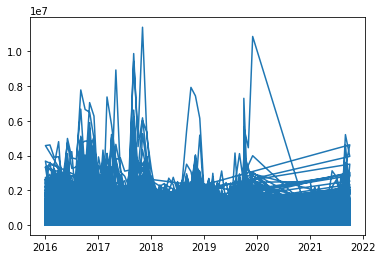

In [21]:
plt.plot(data_1["sellin"])

C:\Users\SAMSON\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


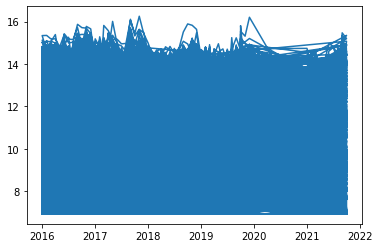

In [22]:
plt.plot(np.log(data_1["sellin"]))

In [23]:
data_1["Log_sellin"]=np.log(data_1["sellin"])
split=len(data_1) - int(0.2*len(data_1))
train,test=data_1["sellin"][0:split],data_1["sellin"][split:]
train_1,test_1=data_1["Log_sellin"][0:split],data_1["Log_sellin"][split:]

C:\Users\SAMSON\AppData\Local\Temp/ipykernel_968/1012236632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1["Log_sellin"]=np.log(data_1["sellin"])


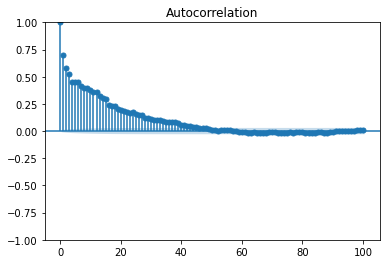

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train,lags=100)
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train)
result

(-22.745759180596536,
 0.0,
 39,
 35886,
 {'1%': -3.4305322373020313,
  '5%': -2.861620544446743,
  '10%': -2.5668128712666682},
 1015706.2784245319)

In [26]:
import hurst

H,c,data=hurst.compute_Hc(train)
print("H={:.4f},c={:.4f}".format(H,c))

H=0.2314,c=1.9270


C:\Users\SAMSON\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


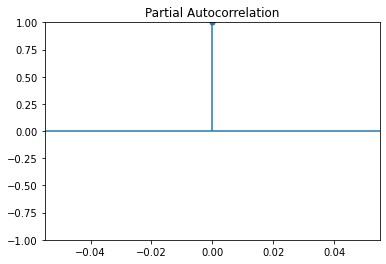

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train_1,lags=60)
plt.show()

In [28]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train.values,order=(1,0,1))
model_fit=model.fit()

In [30]:
predictions=model_fit.predict(len(test_data))
test_=pd.DataFrame(test[0:1528])
test_["predictions"]=predictions[0:1528]
test_

,sellin,predictions
date,,
2018-06-01,1013,50128.174655
2016-01-01,457876,58202.585761
2016-02-01,1065676,53351.440225
2016-03-01,939051,51611.515135
2016-04-01,1853790,50470.993134
...,...,...
2016-08-01,390005,50656.507332
2016-09-01,780010,50128.467431
2016-10-01,276549,51488.506369


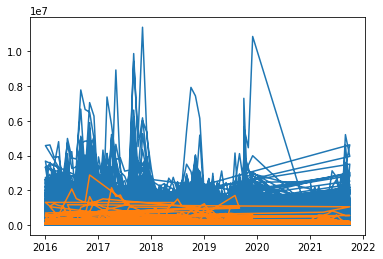

In [31]:
plt.plot(data_1["sellin"])
plt.plot(test_.predictions)
plt.show()

In [32]:
error=mae((test_.values),(predictions[0:1528]))
print("mae:",error)

ValueError: y_true and y_pred have different number of output (2!=1)

In [33]:
len(data_1)

44907

In [34]:
len(test_data)

1528

In [ ]:
df_multi=data_1[["sellin","CAT_GENDER_MEN","CAT_GENDER_WOMEN"]]
train_multi,test_multi=df_multi[0:split],df_multi[split:]

In [ ]:
from scipy.stats.stats import pearsonr
x=train_multi["CAT_GENDER_MEN"]
y=train_multi["sellin"]

In [ ]:
corr,p=pearsonr(x,y)

In [ ]:
print(corr)

In [60]:
predictions=pd.DataFrame(predictions)
predictions

,0
0,50128.174655
1,58202.585761
2,53351.440225
3,51611.515135
4,50470.993134
...,...
34393,49850.312971
34394,49839.315562
34395,53450.701263
34396,53713.019262


C:\Users\SAMSON\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


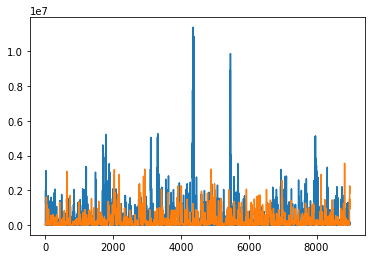

In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(train.values,trend=None )
model_fit=model.fit()
predictions_=model_fit.predict(1528)
predictions_
plt.plot(test.values)
plt.plot(predictions_[1:8981])

In [36]:
mae(test.values,predictions[0:8981])

381208.37494075304

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(data_1[["month","year","CAT_GENDER_MEN","CAT_GENDER_WOMEN"]],data_1["sellin"],test_size=0.3)

In [38]:
lr=LR().fit(X_train,Y_train)

In [39]:
lr.score(X_test,Y_test)
y_pred=lr.predict(X_test)

In [40]:
mae(Y_test,y_pred)

312171.77161235776

In [41]:
from sklearn.neighbors import KNeighborsRegressor as knn
knn=knn(n_neighbors=11).fit(X_train,Y_train)


In [42]:
knn.score(X_test,Y_test)

-0.09155930612828045

In [43]:
y_knn=knn.predict(X_test)
mae(Y_test,y_knn)

330961.22087946936

In [44]:
from sklearn.linear_model import Lasso as knn
knn1 = knn(alpha = 1).fit(X_train, Y_train)
(mae(Y_test,knn1.predict(X_test)))

312170.67533669586

In [45]:
from sklearn.linear_model import LogisticRegression as knn
knn1 = knn(C = 1).fit(X_train, Y_train)
scores.append(mae(Y_test,knn1.predict(X_test)))

KeyboardInterrupt: 

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y_scale=scaler.fit_transform((pd.DataFrame(Y_train)))
y_test_scale=scaler.transform((pd.DataFrame(Y_test)))

In [47]:
y_scale

array([[ 0.37759075],
       [-0.44765937],
       [ 0.4460532 ],
       ...,
       [-0.45321038],
       [ 0.15555036],
       [-0.41990432]])

In [48]:
lr=LR().fit(X_train,(y_scale))
lr.score(X_test,(y_test_scale))

0.0100420229968059

In [49]:
mae(Y_test,scaler.transform(lr.predict(X_test)))

241872.79501319493

In [50]:
X_scaled=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [51]:
lr=LR().fit(X_scaled,y_scale)

In [52]:
mae(Y_test,(lr.predict(X_test)))

241872.33989458298

In [2]:
data_1

NameError: name 'data_1' is not defined

In [1]:
data_1.to_csv("train_fossil.csv")
data2.to_csv("test_fossil.csv")

NameError: name 'data_1' is not defined